# Clustering

In [1]:
#TODO: remove after development 
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

pd.set_option('display.max_columns', 5400)
pd.set_option('max_colwidth', 50)

## Loading data

In [4]:
#seed_name = 'hair_dryer'
#seed_name = 'video_codec'
#seed_name = 'diesel'
#seed_name = "contact_lens"
seed_name = "contact_lens_us_c"
#seed_name = "3d_printer"

src_dir = "."

In [5]:
import pickle

with open(src_dir + "/data/" + seed_name + "/baseline/tsne.pkl", 'rb') as infile:
    df = pickle.load(infile)   
print(df.shape)
df.head()

(2595, 24)


,pub_num,publication_number,country_code,family_id,priority_date,title_text,abstract_text,claims_text,tokens,year,month,day,ipc_classes,first_letters,three_letters,four_letters,before_slash,references,referenced_by,raw_assignees,assignees,terms,x,y
0,6536898,US-6536898-B1,US,24663616,20000915,Extended depth of field optics for human vision,The present invention provides extended depth ...,What is claimed is: \n \n 1. Appara...,"[extended, depth, optics, human, vision, exten...",2000,9,15,"[A61F2/14, A61F2/16, G02B3/00, G02C7/04]","[A, G]","[A61, G02]","[A61F, G02B, G02C]","[A61F2, G02B3, G02C7]","[US-5748371-A, US-5476515-A]","[US-9329407-B2, US-7025454-B2, US-9759930-B2, ...",[UNIV COLORADO],[UNIV COLORADO],"[transfer function, mask, light transmitted, a...",21.329716,-61.530895
1,2014036225,US-2014036225-A1,US,48875618,20120731,Lens incorporating myopia control optics and m...,"Ophthalmic devices, such as contact lenses, ma...",What is claimed is: \n \n 1 . An o...,"[lens, incorporating, myopia, control, optics,...",2012,7,31,[G02C7/04],[G],[G02],[G02C],[G02C7],"[US-2008194481-A1, US-7637612-B2, US-201023963...","[US-9759930-B2, US-10203522-B2, US-9541773-B2,...","[SHEDDEN JR ARTHUR H, CHENG XU, CHEHAB KHALED]","[CHENG XU, CHEHAB KHALED, SHEDDEN JR ARTHUR H]","[myopia progression, inhibiting, progression, ...",30.915665,-72.581940
2,2017164704,US-2017164704-A1,US,34915775,20020817,Packaging for Disposable Soft Contact Lenses,The present disclosure provides a contact lens...,What is claimed is: \n \n 1 . A si...,"[packaging, disposable, soft, contact, lenses,...",2002,8,17,"[A45C11/00, A45C11/04, A47F1/00, A61F9/00, B32...","[A, B, G]","[A45, A47, A61, B32, B65, G02, G11]","[A45C, A47F, A61F, B32B, B65B, B65D, G02C, G11B]","[A45C11, A47F1, A61F9, B32B1, B32B3, B65B11, B...","[US-4782942-A, US-2002175177-A1, US-3610516-A,...",[],[MENICON SINGAPORE PTE LTD],[ALCON MFG LTD],"[sheets, package, hydration medium, package pa...",-17.739506,21.483154
3,5401431,US-5401431-A,US,17709917,19921001,Cleaning-preserving aqueous solution for conta...,A cleaning-preserving aqueous solution for con...,We claim: \n \n 1. A cleaning-preser...,"[cleaning, preserving, aqueous, solution, cont...",1992,10,1,"[A61L12/04, A61L2/04, C11D1/722, C11D1/74, C11...","[A, C, G]","[A61, C11, G02]","[A61L, C11D, G02C]","[A61L12, A61L2, C11D1, C11D3, G02C13]","[JP-H0368503-A, JP-H02115116-A, JP-H04342508-A...",[],[TOMEI SANGYO KK],[TOMEI SANGYO KK],"[preserving, sorbitol, solution contact, polyo...",45.706642,43.502560
4,2011019148,US-2011019148-A1,US,43497041,20090727,Multifocal diffractive contact lens with bi-si...,A contact lens for placing over the eye is des...,1 . An optic comprising a contact lens having ...,"[multifocal, diffractive, contact, lens, sign,...",2009,7,27,[G02C7/04],[G],[G02],[G02C],[G02C7],"[US-4340283-A, US-5054905-A, US-5114483-A, US-...",[US-9248309-B2],[PORTNEY VALDEMAR],[PORTNEY VALDEMAR],"[sign, longitudinal, ray, front surfaces, aber...",9.096503,-68.840988


### Hierarchical clustering

In [6]:
%%time

import scipy.cluster.hierarchy as shc

clustering_features = df[["x", "y"]]
linkage = shc.linkage(clustering_features, method='average', metric='euclidean')

Wall time: 141 ms


Based on this linkage we can plot the dendogram.<br>

The parameter `max_d` gives you the possibility to decide at which `x` value you want to split.

In [7]:
max_d = {}
max_d["hair_dryer"] = {"big": 13, "medium": 6, "small": 3}
max_d["video_codec"] = {"big": 40, "medium": 20, "small": 11}
max_d["diesel"] = {"big": 60, "medium": 30, "small": 17}
max_d["contact_lens"] = {"big": 60, "medium": 25, "small": 16}
max_d["contact_lens_us_c"] = {"big": 43, "medium": 27, "small": 15}
max_d["3d_printer"] = {"big": 50, "medium": 15, "small": 9}

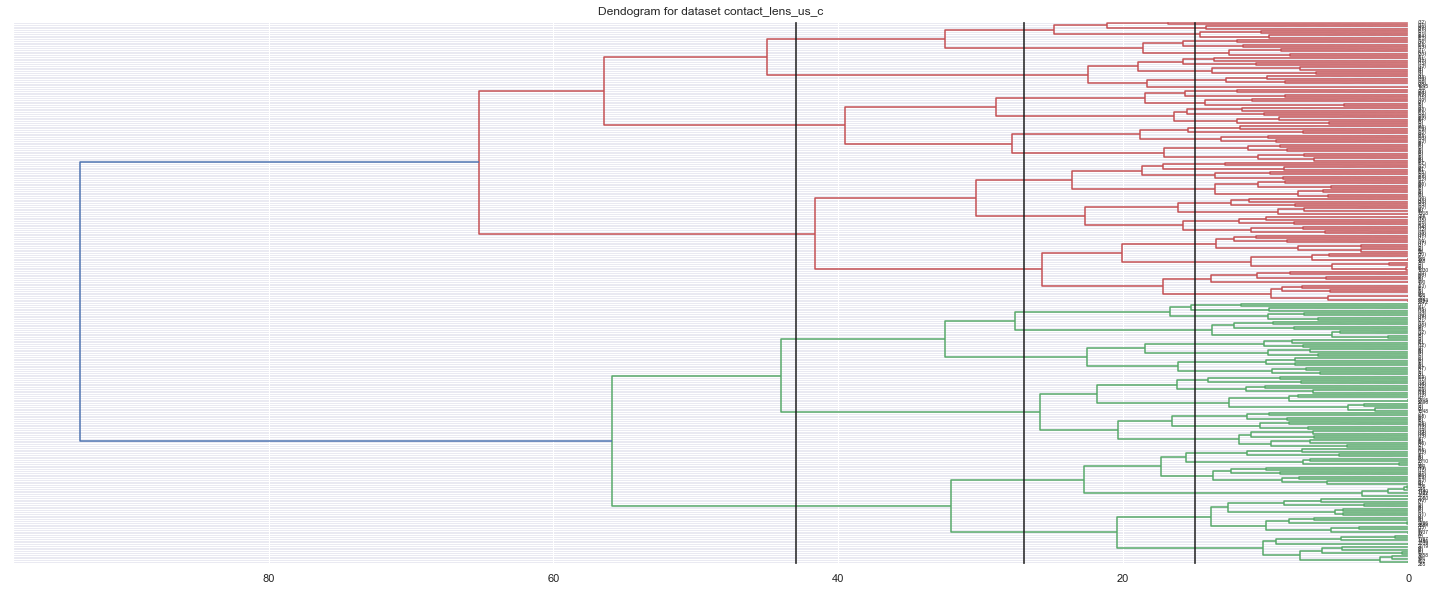

In [8]:
plt.figure(figsize=(25, 10))  
plt.title("Dendogram for dataset " + seed_name)

dend = shc.dendrogram(linkage, p=7, truncate_mode='level', orientation='left', show_leaf_counts=True, show_contracted=True)

for k, v in max_d[seed_name].items():
    plt.axvline(x=v, c='k')

In [9]:
from nltk.stem.snowball import SnowballStemmer
from fiz_lernmodule.word2vec import Word2VecReader

def get_similar_words(word2vec_model, stemmer, labels):
    augmented = {}
    
    for label in labels:
        if len(label.split(" ")) == 1: # word2vec model cannot work with n-grams
            augmented[label] = []
            similar = word2vec_model.find_similar(label, 10)        
            stemmed_label = stemmer.stem(label)
            for s in similar:
                word = s['word']
                stemmed_word = stemmer.stem(word)
                if stemmed_word != stemmed_label:
                    augmented[label].append(word)
        
    return augmented

stemmer = SnowballStemmer("english")

w2v_loader = Word2VecReader(src_dir=src_dir)
w2v_model = w2v_loader.load_word_embeddings()

Load mappings from .\5.9m\vocab\vocab.csv
Load config from .\5.9m\vocab\config.csv
INFO:tensorflow:Restoring parameters from .\5.9m\checkpoints\5.9m_abstracts.ckpt-1325000


In [10]:
def filter_similar_by_occurence(tokens, augmented):
    filtered = {}
    for k, v in augmented.items():
        filtered[k] = []
        for word in v:
            contains = tokens.map(lambda x: word in x)
            num_contains = contains.values.sum() 
            if num_contains > len(tokens) / 10:
                if word not in augmented.keys():
                    filtered[k].append(word)
    return filtered

In [11]:
from collections import Counter

def collect_counts(col):
    counter = Counter()
    tokens = [item for sublist in col.values for item in sublist]
    for token in tokens:
        counter[token] +=1        
    return counter

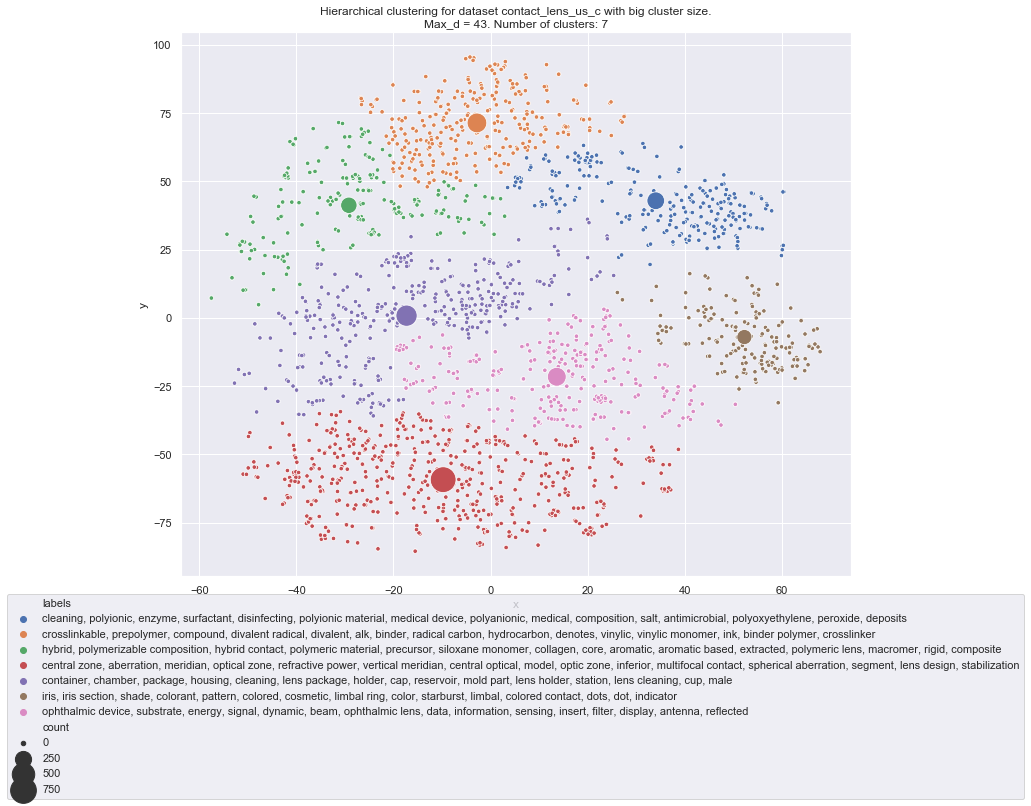

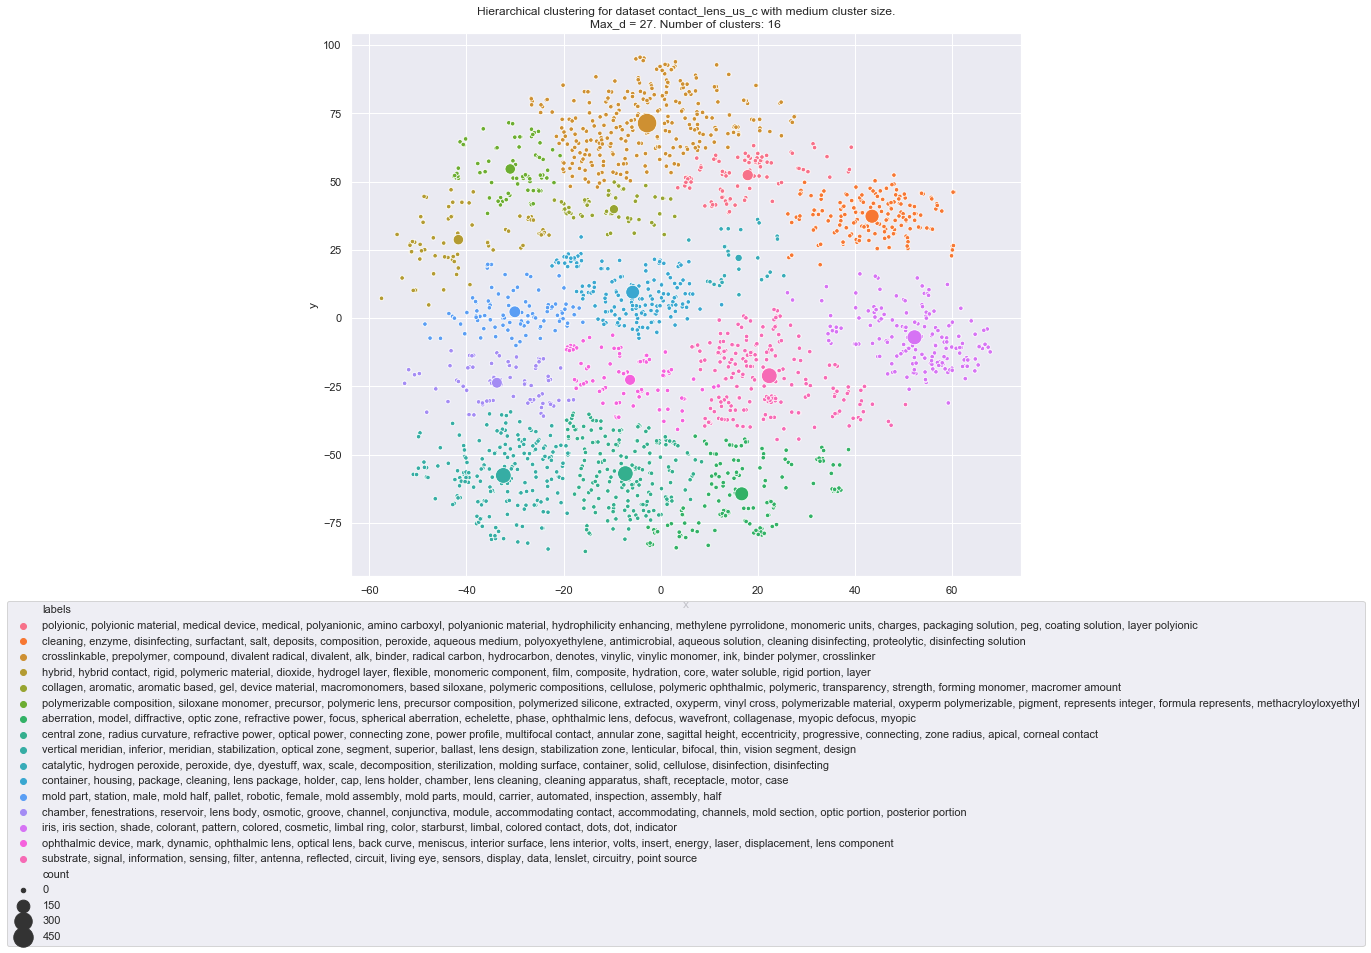

Couldn't find echelette


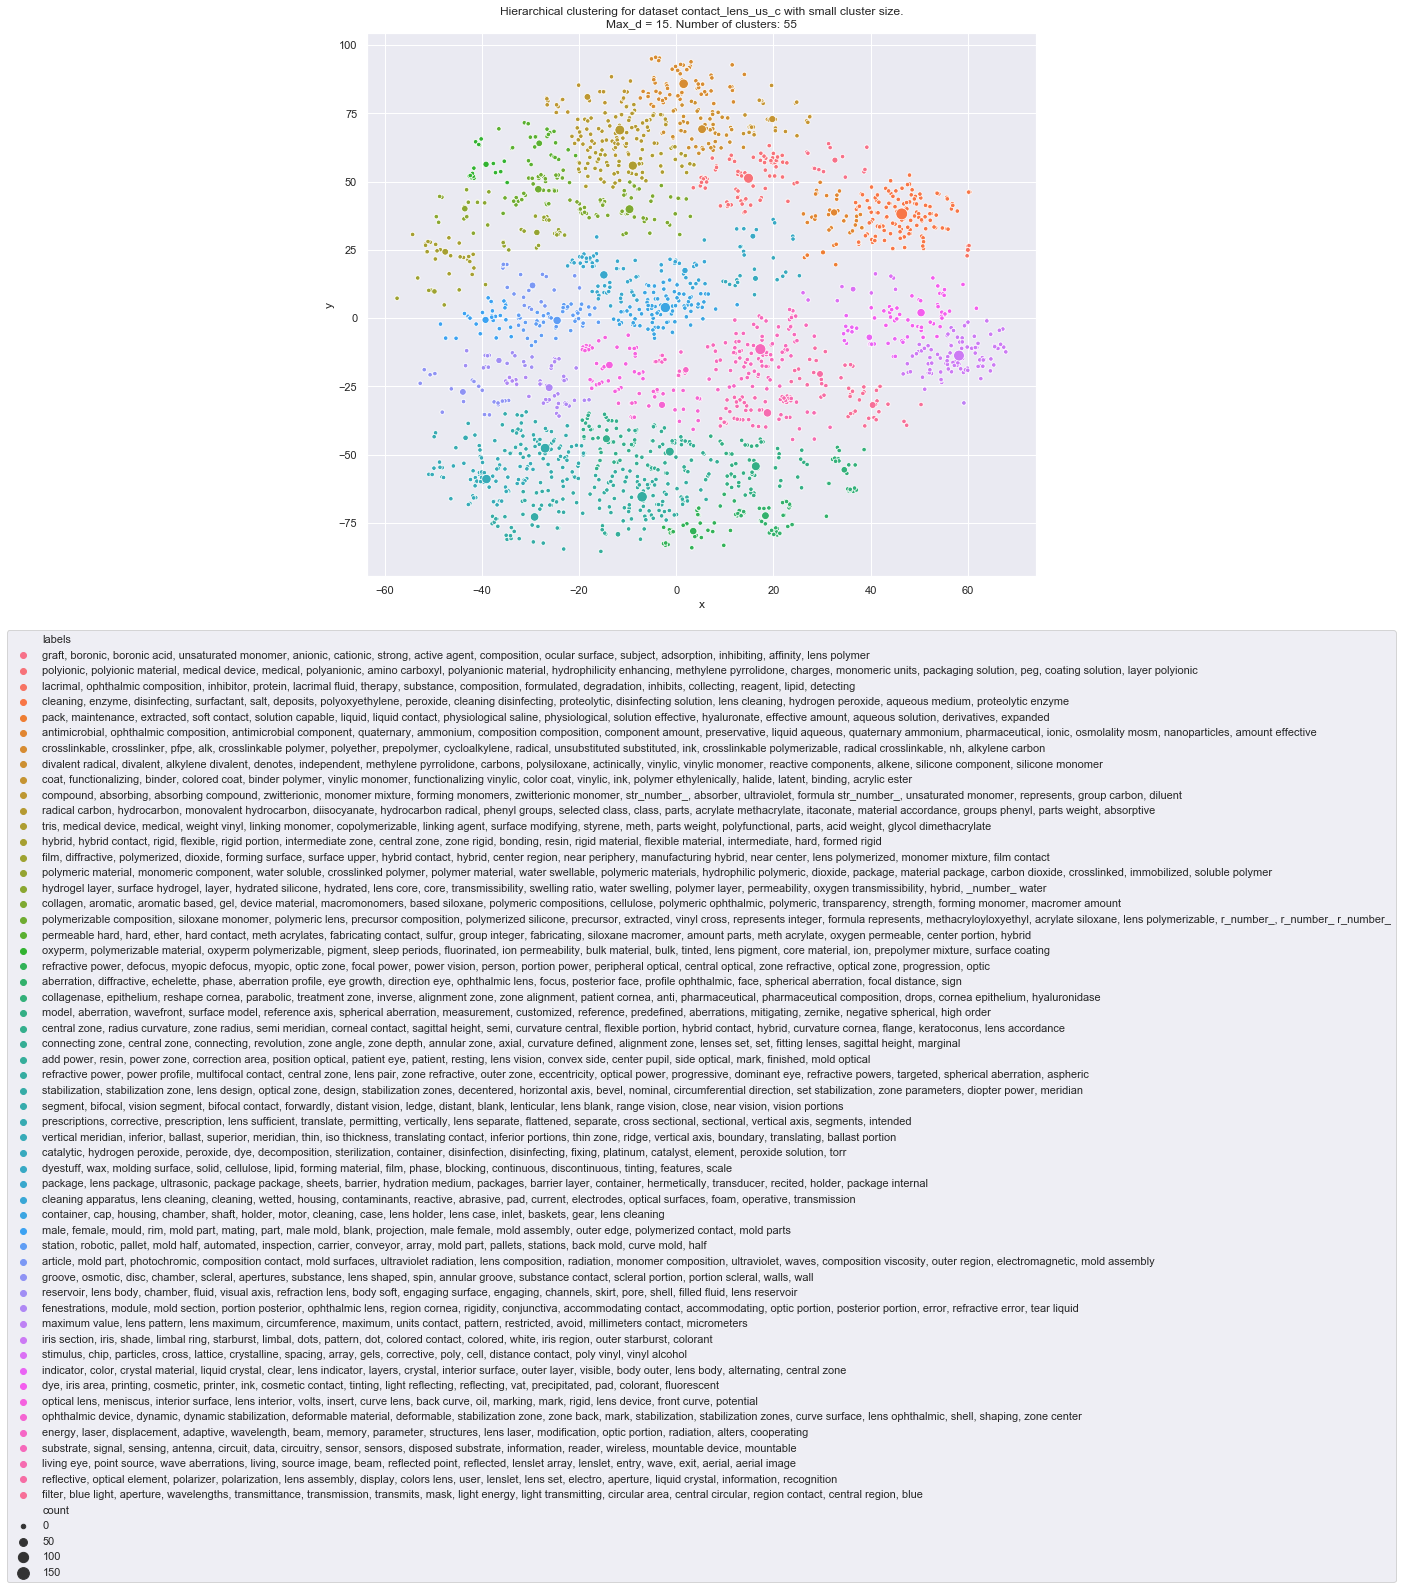

Wall time: 10min 13s


In [12]:
%%time
from scipy.cluster.hierarchy import fcluster
from scipy import stats

number_of_key_terms = 15
count_first_n_terms = 10
augment_first_n_terms = 3

total_cluster_centers = pd.DataFrame(columns = ['id', "x", "y", "min_x", "min_y", 'max_x', 'max_y', 'count', 'labels', 'augmented_labels', 'level', 'ids'])

for cluster_size in ["big", "medium", "small"]:

    fcluster_pred = fcluster(linkage, max_d[seed_name][cluster_size], criterion='distance')    
    cluster_indexes = pd.unique(fcluster_pred)

    plot_data = pd.DataFrame(columns = ['x', "y", "labels", "count"])
    
    cluster_centers = pd.DataFrame(columns = total_cluster_centers.columns)

    for i in range(len(cluster_indexes)):
        cluster = df[fcluster_pred == i + 1]
        
        cooccurent = collect_counts(cluster["terms"].apply(lambda x: x[:count_first_n_terms]))        
        labels = [i[0] for i in cooccurent.most_common(number_of_key_terms)]
        
        similar_words = get_similar_words(w2v_model, stemmer,  labels[:augment_first_n_terms])               
        augmented = filter_similar_by_occurence(cluster["tokens"], similar_words)
               
        ids = pd.unique(cluster.publication_number)
        
        count = len(ids)

        without_outliers = cluster[["x", "y"]]
        #without_outliers = without_outliers[(np.abs(stats.zscore(without_outliers)) < 3).all(axis=1)]
           
        min_x = np.min(without_outliers.x)
        min_y = np.min(without_outliers.y)
        max_x = np.max(without_outliers.x)
        max_y = np.max(without_outliers.y)
        
        x = np.mean(without_outliers.x)
        y = np.mean(without_outliers.y)

        d = {"id": [i], "x": [x], "y": [y], "min_x": [min_x], "min_y": [min_y], "max_x": [max_x], "max_y": [max_y], "count": [count], 
                 'labels': [", ".join(labels)], 'level': cluster_size, 'ids': [ids], 'augmented_labels': [augmented]}    
        cluster_centers = cluster_centers.append(pd.DataFrame(data=d), sort=False)
                
        plot_d = {"x": cluster.x, "y": cluster.y, "count": [1]*cluster.shape[0]}         
        cluster_plot_data = pd.DataFrame(data = plot_d)        
        cluster_plot_data["labels"] = ", ".join(labels)
        
        plot_data = plot_data.append(cluster_plot_data, sort=False)
        
    #cluster_centers.reset_index(inplace=True, drop=True)
    
    plot_data_with_centroids = plot_data.append(cluster_centers, sort=False)
    plot_data_with_centroids['count'] = pd.to_numeric(plot_data_with_centroids["count"])
       
    fig, ax = plt.subplots(figsize=(12,10))
    ax = sns.scatterplot(x="x", y="y", data=plot_data_with_centroids, hue="labels", size="count", sizes=(20, np.max(cluster_centers["count"])))
    plt.title("Hierarchical clustering for dataset " + seed_name + " with " + cluster_size + " cluster size.\nMax_d = " 
              + str(max_d[seed_name][cluster_size]) + ". Number of clusters: " + str(len(cluster_indexes)))
    plt.legend(bbox_to_anchor=(0.5, -len(cluster_indexes)*0.03 - 0.2), loc=8, borderaxespad=0.)
    plt.show()
    
    cluster_centers["labels"] = cluster_centers['labels'].map(lambda x: x.split(", "))
    #cluster_centers.index.rename("id", inplace=True)
    #cluster_centers.reset_index(inplace=True)
    
    total_cluster_centers = total_cluster_centers.append(cluster_centers,sort=False)
    
    total_cluster_centers.to_json(src_dir + "/../demo/data/baseline/" + seed_name + "_clusters.json", orient="records", index=True) #write intermediate results to prevent long wait

In [13]:
print(total_cluster_centers.head())
total_cluster_centers.tail()

  id          x          y      min_x      min_y      max_x      max_y count  \
0  0  34.008729  42.931322   3.502580  19.576769  60.425404  63.898697   299   
0  1  -2.814227  71.444228 -26.703135  48.037949  27.576080  95.574188   377   
0  2 -29.189787  41.269613 -57.496239   4.834701   2.899643  71.573097   255   
0  3  -9.770512 -59.257051 -50.958313 -85.471863  38.667603 -34.342701   662   
0  4 -17.309900   0.827530 -52.748604 -35.920277  25.341955  36.138950   442   

                                              labels  \
0  [cleaning, polyionic, enzyme, surfactant, disi...   
0  [crosslinkable, prepolymer, compound, divalent...   
0  [hybrid, polymerizable composition, hybrid con...   
0  [central zone, aberration, meridian, optical z...   
0  [container, chamber, package, housing, cleanin...   

                                    augmented_labels level  \
0  {'cleaning': ['rinsing'], 'polyionic': [], 'en...   big   
0  {'crosslinkable': ['polymerizable', 'monomer']...   big

,id,x,y,min_x,min_y,max_x,max_y,count,labels,augmented_labels,level,ids
0,50,1.971346,-18.930536,-4.429869,-26.213055,11.871916,-12.390710,25,"[energy, laser, displacement, adaptive, wavele...","{'energy': ['kinetic', 'power', 'electric'], '...",small,"[US-2006061729-A1, US-2006087614-A1, US-200916..."
0,51,17.313599,-11.373478,6.439000,-25.924137,28.424429,3.158333,117,"[substrate, signal, sensing, antenna, circuit,...","{'substrate': ['layer', 'film', 'silicon', 'fo...",small,"[US-2018036974-A1, US-2014232982-A1, US-972025..."
0,52,18.772659,-34.700750,9.065269,-44.468075,31.666756,-28.552181,60,"[living eye, point source, wave aberrations, l...",{},small,"[US-7789512-B2, US-4664490-A, US-3954329-A, US..."
0,53,29.590463,-20.456612,23.659859,-29.006645,36.354000,-11.010809,31,"[reflective, optical element, polarizer, polar...","{'reflective': ['light'], 'polarizer': ['biref...",small,"[US-2006215110-A1, US-2010053549-A1, US-200921..."
0,54,40.435929,-31.831061,35.379429,-39.484425,50.401314,-24.973772,32,"[filter, blue light, aperture, wavelengths, tr...","{'filter': ['pass'], 'aperture': ['circular']}",small,"[US-2017038605-A1, US-5786883-A, US-6948815-B2..."
